In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

First of all, import necessary package

In [12]:
data = pd.read_csv("ufc-master.csv",usecols=list(range(77)))
data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,11,0,1,-2,0.00,-5.08,5,2.58,-0.6,-0.31


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 77 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4896 non-null   object 
 1   B_fighter                     4896 non-null   object 
 2   R_odds                        4895 non-null   float64
 3   B_odds                        4896 non-null   int64  
 4   R_ev                          4895 non-null   float64
 5   B_ev                          4896 non-null   float64
 6   date                          4896 non-null   object 
 7   location                      4896 non-null   object 
 8   country                       4896 non-null   object 
 9   Winner                        4896 non-null   object 
 10  title_bout                    4896 non-null   bool   
 11  weight_class                  4896 non-null   object 
 12  gender                        4896 non-null   object 
 13  no_

After the exploration, we see the different columns or in this case, the feature we could use to make prediction. After exploration, I will drop all unnecessary column that does not affect the prediction.

In [14]:
x = data.drop(['Winner','date','location','country'],axis=1)
y = data['Winner']

In [15]:
column_name = list(x)
column_name

['R_fighter',
 'B_fighter',
 'R_odds',
 'B_odds',
 'R_ev',
 'B_ev',
 'title_bout',
 'weight_class',
 'gender',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_title_bouts',
 'B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_win_by_TKO_Doctor_Stoppage',
 'B_wins',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weight_lbs',
 'R_current_lose_streak',
 'R_current_win_streak',
 'R_draw',
 'R_avg_SIG_STR_landed',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_landed',
 'R_avg_TD_pct',
 'R_longest_win_streak',
 'R_losses',
 'R_total_rounds_fought',
 'R_total_title_bouts',
 'R_win_by_Decision_Majority',
 'R_win_by_Decision_Split',
 'R_win_by_Decision_Unanimous',
 'R_win_by_KO/TKO',
 'R_win_by_Subm

Explore the unique value of weight_class and gender

In [16]:
x['weight_class'].unique()

array(['Light Heavyweight', 'Welterweight', 'Middleweight', 'Lightweight',
       "Women's Flyweight", "Women's Bantamweight", 'Bantamweight',
       'Featherweight', 'Heavyweight', 'Catch Weight', 'Flyweight',
       "Women's Strawweight", "Women's Featherweight"], dtype=object)

In [17]:
x['gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

There from the sample data, we can tell that there is repeat of the same Athlete in both Athlete A and Athlete B, in order to do the visualization, we will need to clean the data first by adding these Athlete into a new dataframe name unique_athlete

In [18]:
# Split the dataframe into R_fighter and B_fighter dataframes
df_R = x[['R_fighter', 'weight_class', 'R_odds', 'R_ev', 'R_current_lose_streak', 'R_current_win_streak', 
           'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 
           'R_avg_TD_pct', 'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 
           'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 
           'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms', 'R_Reach_cms', 
           'R_Weight_lbs', 'R_age']]

df_B = x[['B_fighter','weight_class', 'B_odds', 'B_ev', 'B_current_lose_streak', 'B_current_win_streak', 
           'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 
           'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 
           'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 
           'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 
           'B_Weight_lbs', 'B_age']]

# Rename columns to have matching names
df_R.columns = ['Name', 'weight_class', 'Odds', 'Ev', 'Current_lose_streak', 'Current_win_streak', 'Draw',
                'Avg_SIG_STR_landed', 'Avg_SIG_STR_pct', 'Avg_SUB_ATT', 'Avg_TD_landed', 'Avg_TD_pct',
                'Longest_win_streak', 'Losses', 'Total_rounds_fought', 'Total_title_bouts', 'Win_by_Decision_Majority',
                'Win_by_Decision_Split', 'Win_by_Decision_Unanimous', 'Win_by_KO/TKO', 'Win_by_Submission',
                'Win_by_TKO_Doctor_Stoppage', 'Wins', 'Stance', 'Height_cms', 'Reach_cms', 'Weight_lbs', 'Age']

df_B.columns = df_R.columns

# Concatenate the R and B dataframes then drop the duplicates
df_combined = pd.concat([df_R, df_B], ignore_index=True)
df_athletes = df_combined.drop_duplicates(subset=['Name'])

In [19]:
df_athletes.head()

,Name,weight_class,Odds,Ev,Current_lose_streak,Current_win_streak,Draw,Avg_SIG_STR_landed,Avg_SIG_STR_pct,Avg_SUB_ATT,...,Win_by_Decision_Unanimous,Win_by_KO/TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Wins,Stance,Height_cms,Reach_cms,Weight_lbs,Age
0,Thiago Santos,Light Heavyweight,-150.0,66.666667,3,0,0,3.95,0.48,0.1,...,2,11,0,0,13,Orthodox,187.96,193.04,205,37
1,Alex Oliveira,Welterweight,170.0,170.000000,2,0,0,2.97,0.51,0.5,...,3,4,3,0,11,Orthodox,180.34,193.04,170,33
2,Misha Cirkunov,Middleweight,110.0,110.000000,1,0,0,3.77,0.49,1.7,...,0,1,5,0,6,Orthodox,190.50,195.58,205,34
3,Alexander Hernandez,Lightweight,-675.0,14.814815,1,0,0,3.79,0.36,0.0,...,2,2,0,0,4,Orthodox,175.26,182.88,155,29
4,Joe Solecki,Lightweight,-135.0,74.074074,0,4,0,2.64,0.62,0.6,...,2,0,2,0,4,Orthodox,175.26,177.80,155,28


Visualization of the feature in below

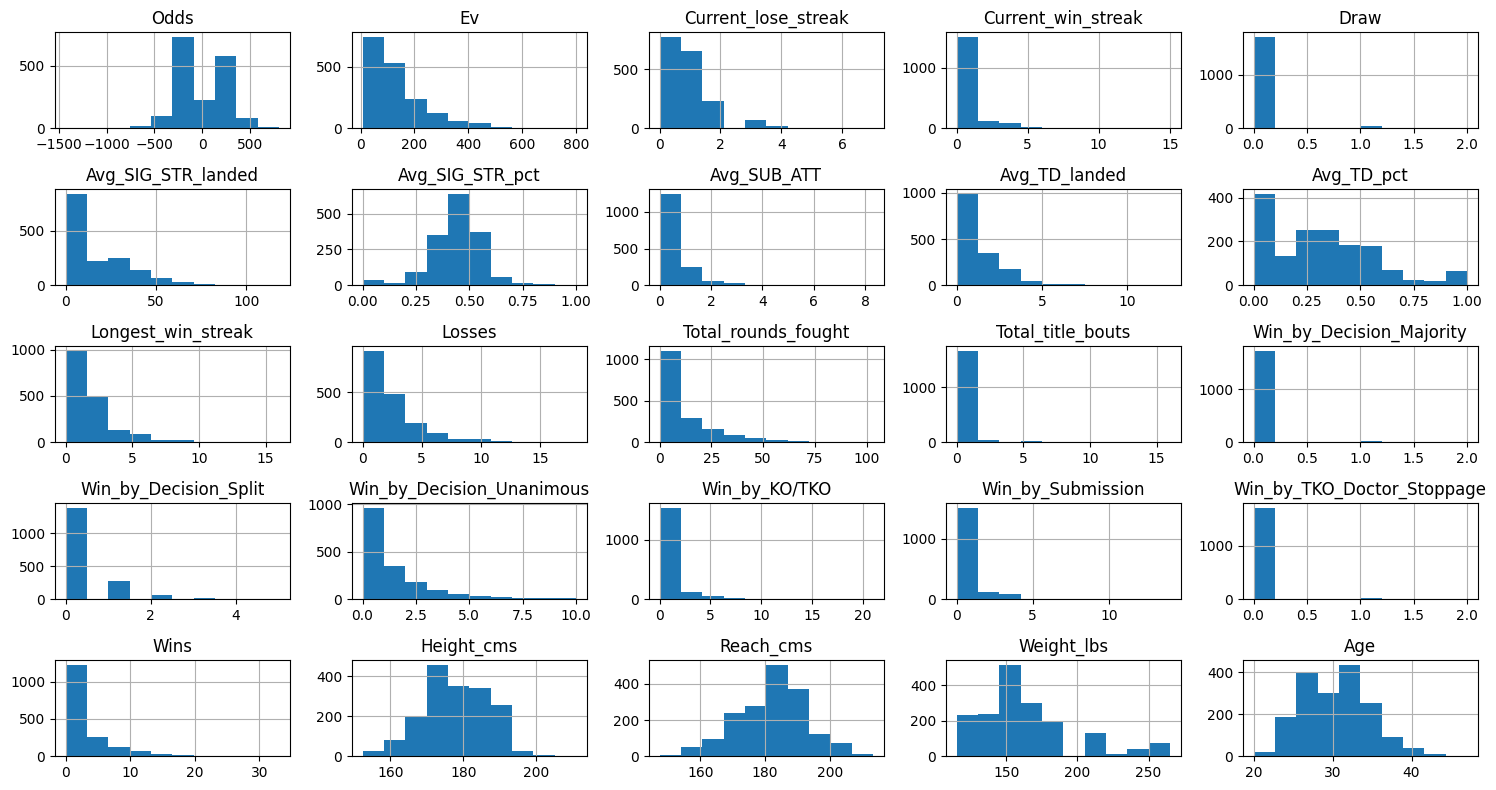

In [20]:
df_athletes.hist(figsize=(15,8))
plt.tight_layout()

In [21]:
weight_class_dfs = {}

# Group df_athletes by 'weight_class' and iterate over the groups
for weight_class, group_df in df_athletes.groupby('weight_class'):
    # Assign the group DataFrame to the corresponding weight class key in the dictionary
    weight_class_dfs[weight_class] = group_df


Visualization based on 'Light Heavyweight', 'Welterweight', 'Middleweight', 'Lightweight',
       "Women's Flyweight", "Women's Bantamweight", 'Bantamweight',
       'Featherweight', 'Heavyweight', 'Catch Weight', 'Flyweight',
       "Women's Strawweight", "Women's Featherweight"

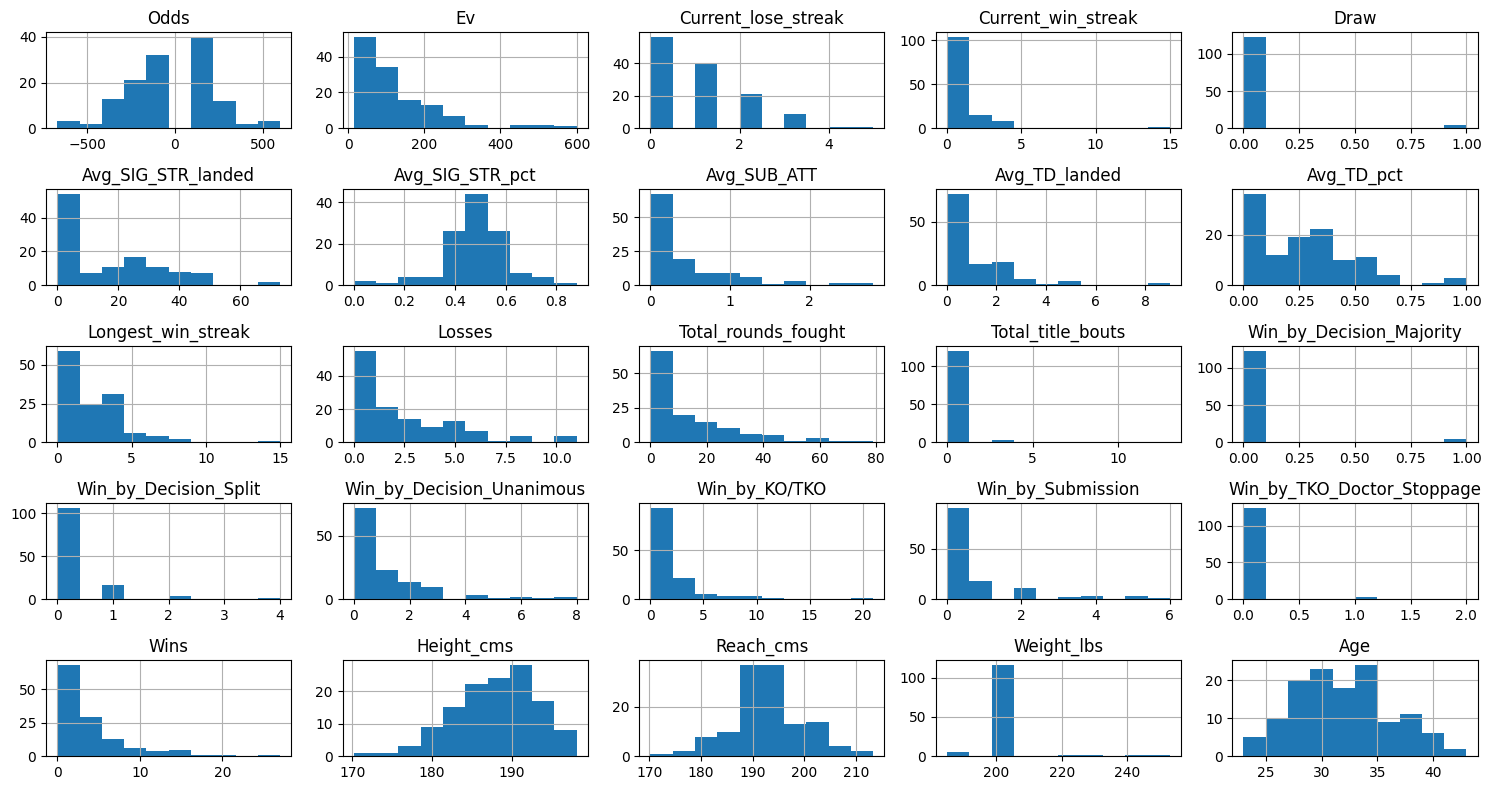

In [22]:
light_heavy_weight_df = weight_class_dfs['Light Heavyweight']
light_heavy_weight_df.hist(figsize=(15,8))
plt.tight_layout()

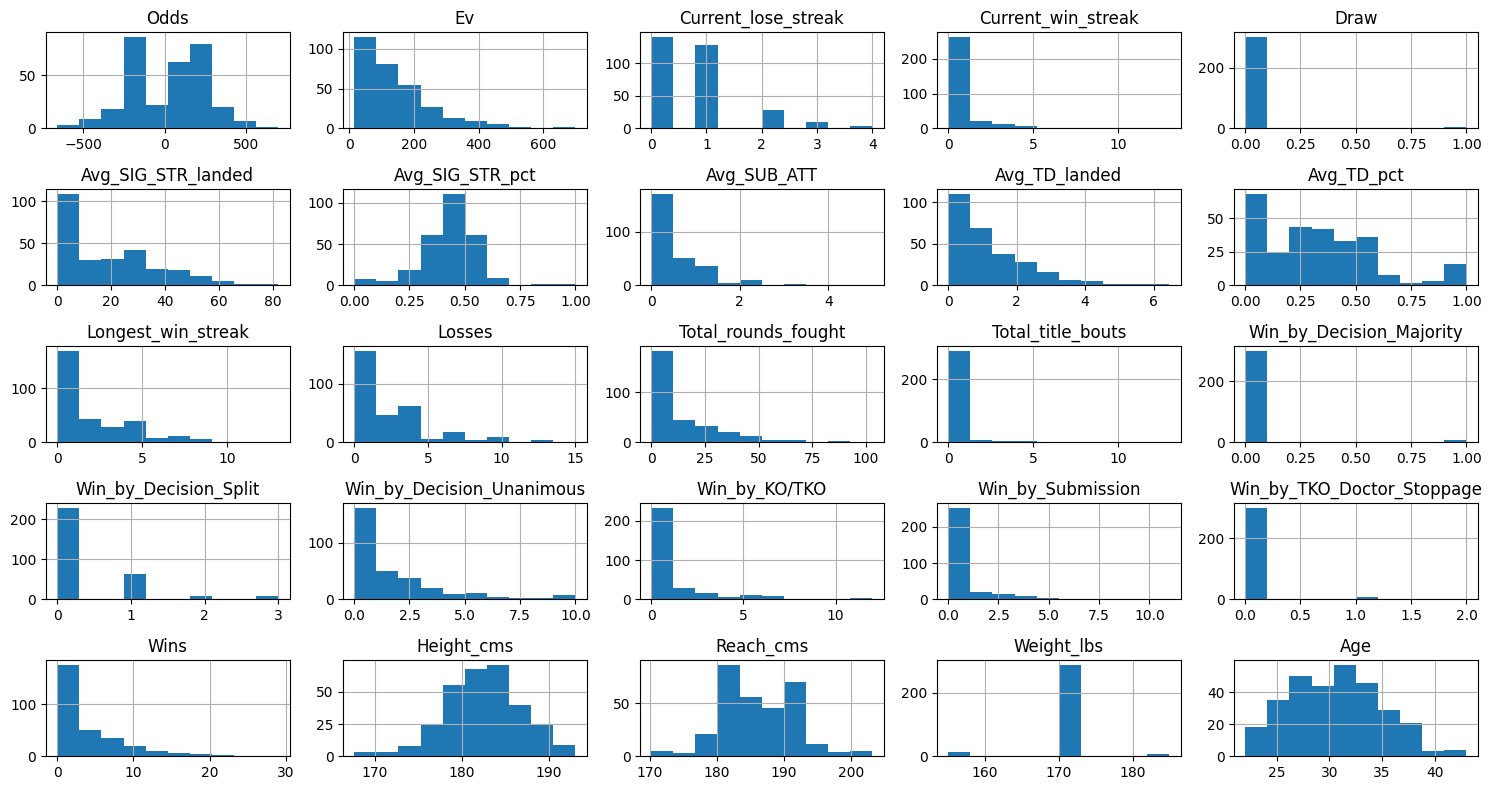

In [23]:
welter_weight_df = weight_class_dfs['Welterweight']
welter_weight_df.hist(figsize=(15,8))
plt.tight_layout()

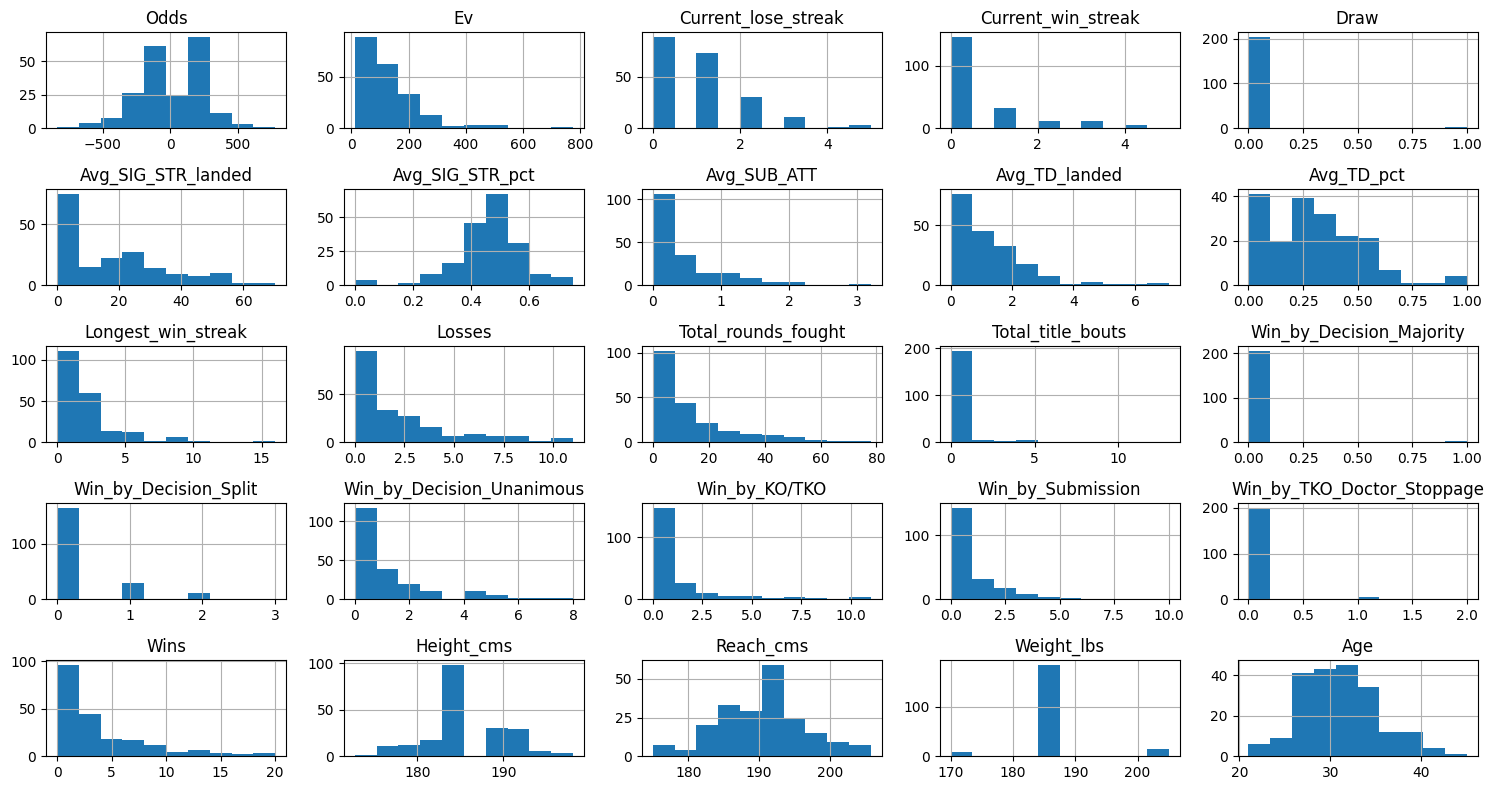

In [24]:
middle_weight_df = weight_class_dfs['Middleweight']
middle_weight_df.hist(figsize=(15,8))
plt.tight_layout()

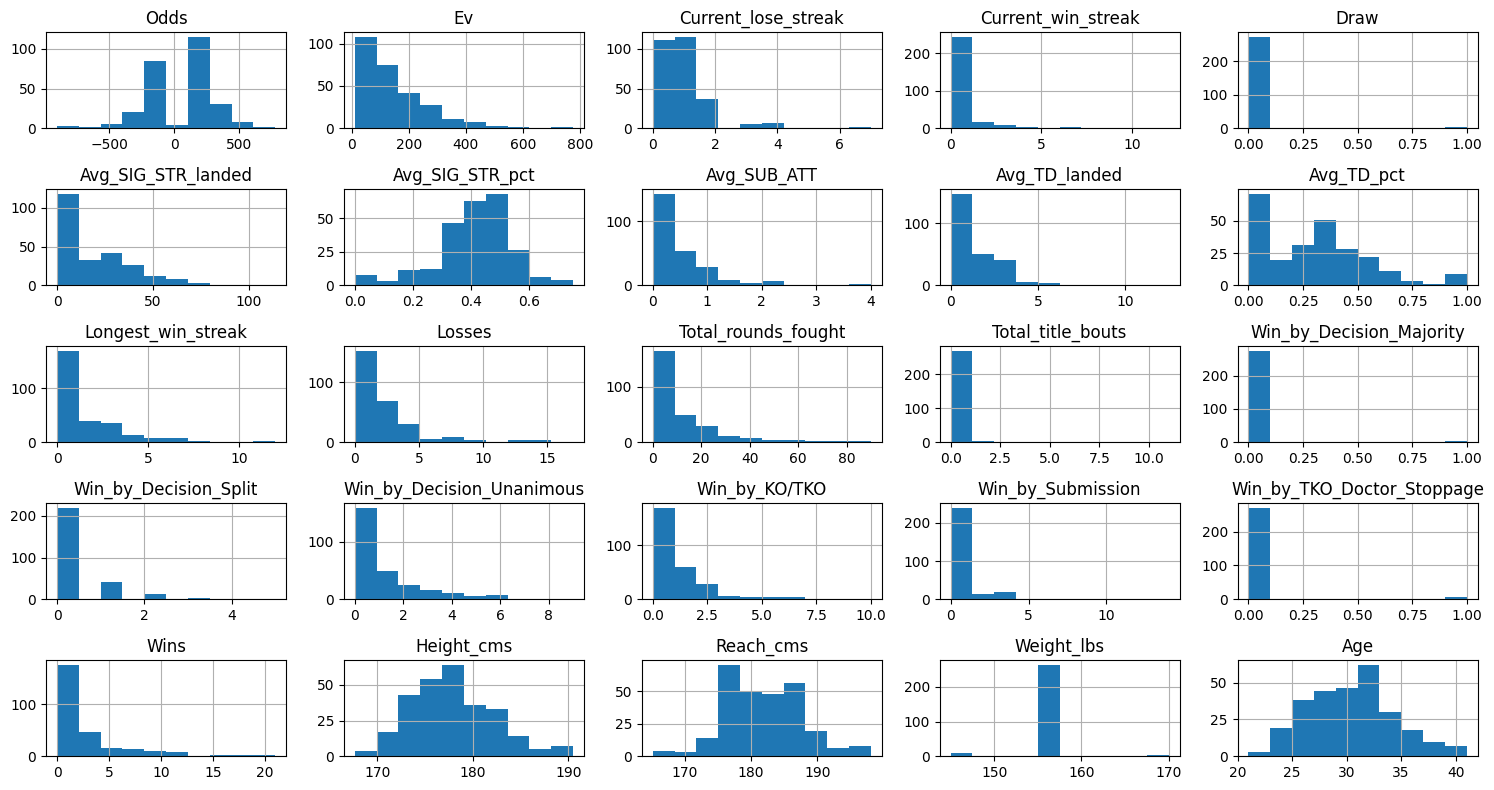

In [25]:
light_weight_df = weight_class_dfs['Lightweight']
light_weight_df.hist(figsize=(15,8))
plt.tight_layout()

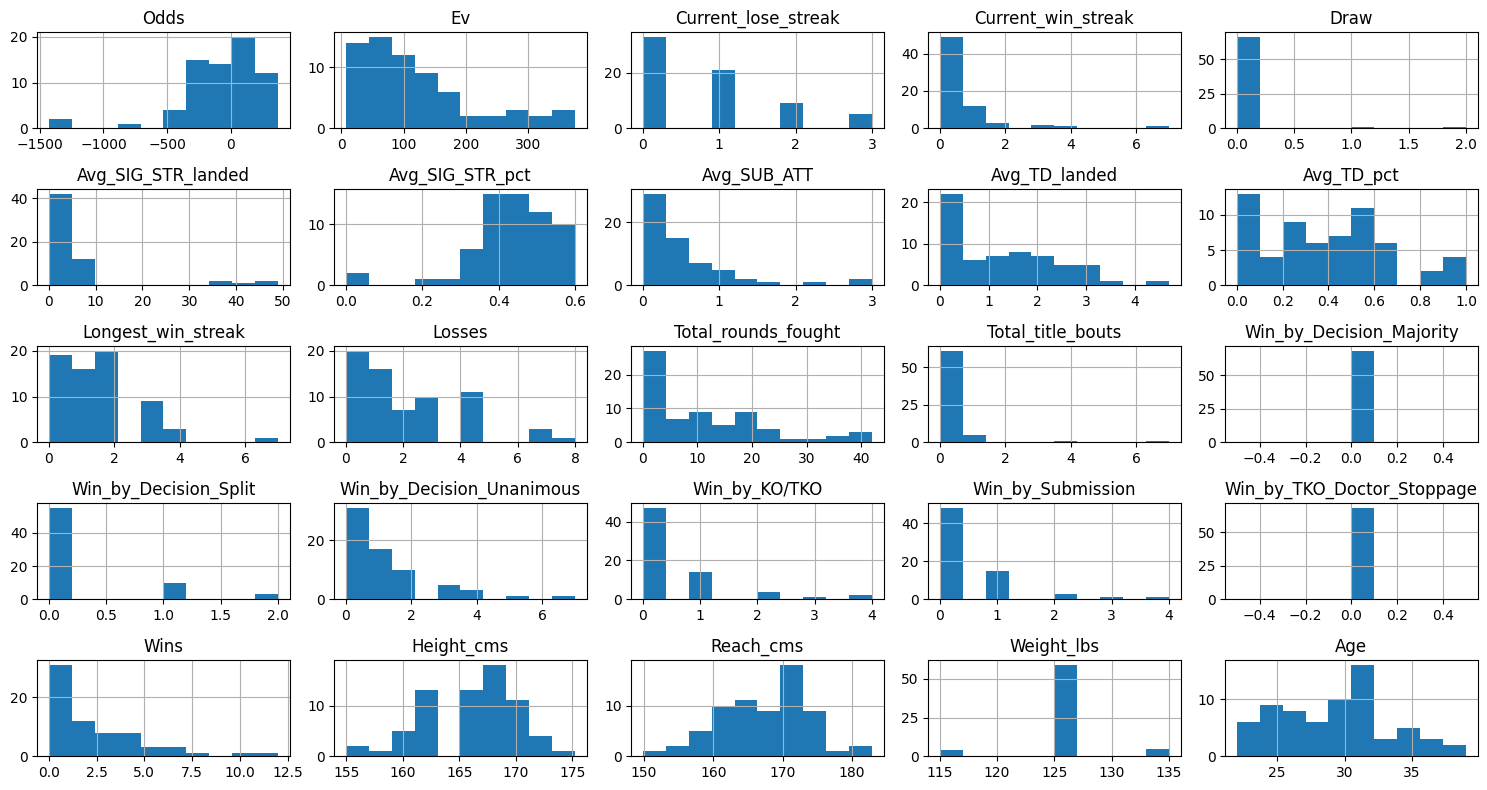

In [26]:
women_flight_weight_df = weight_class_dfs['Women\'s Flyweight']
women_flight_weight_df.hist(figsize=(15,8))
plt.tight_layout()

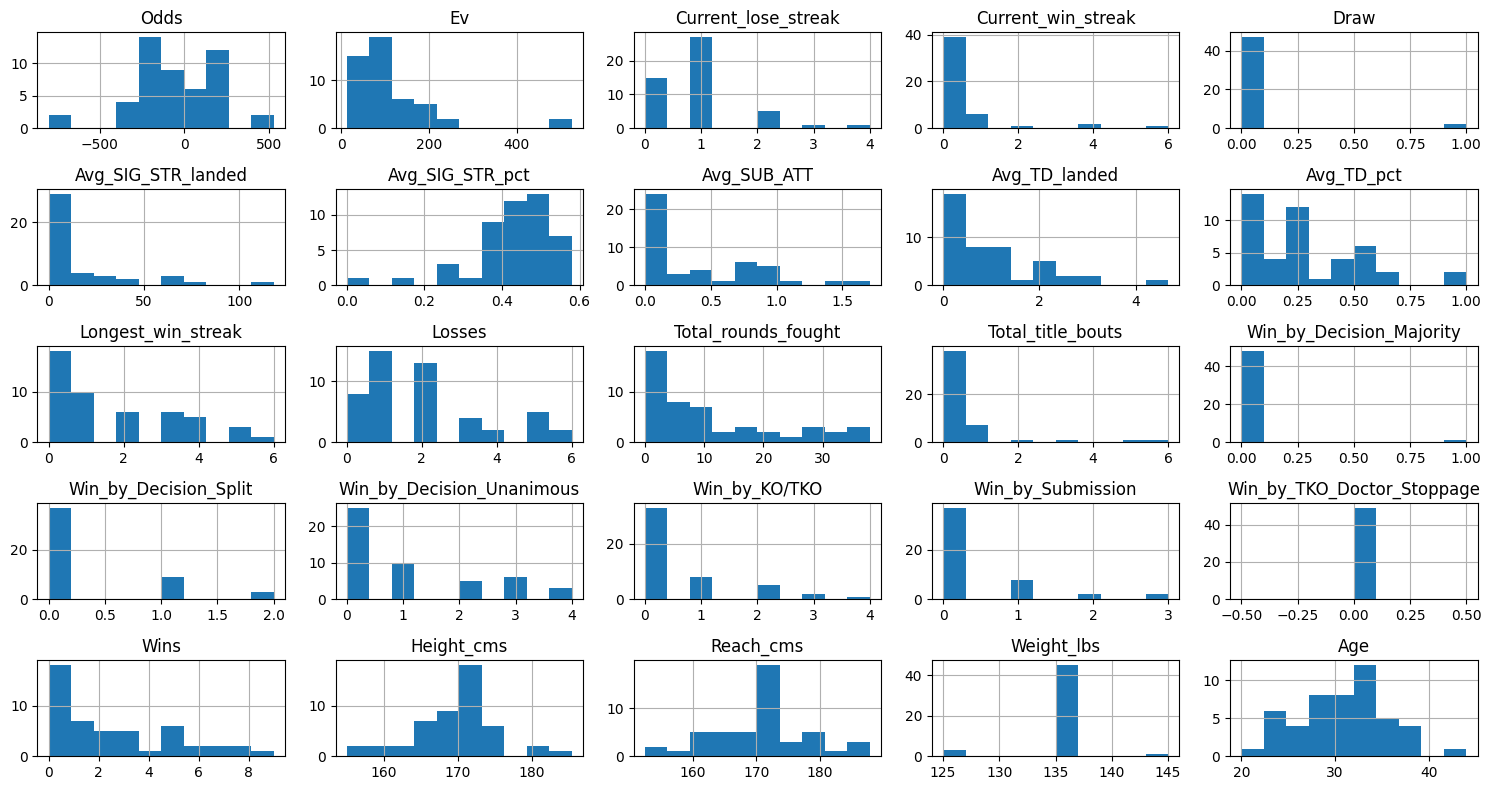

In [27]:
women_bantamweight_weight_df = weight_class_dfs["Women's Bantamweight"]
women_bantamweight_weight_df.hist(figsize=(15,8))
plt.tight_layout()

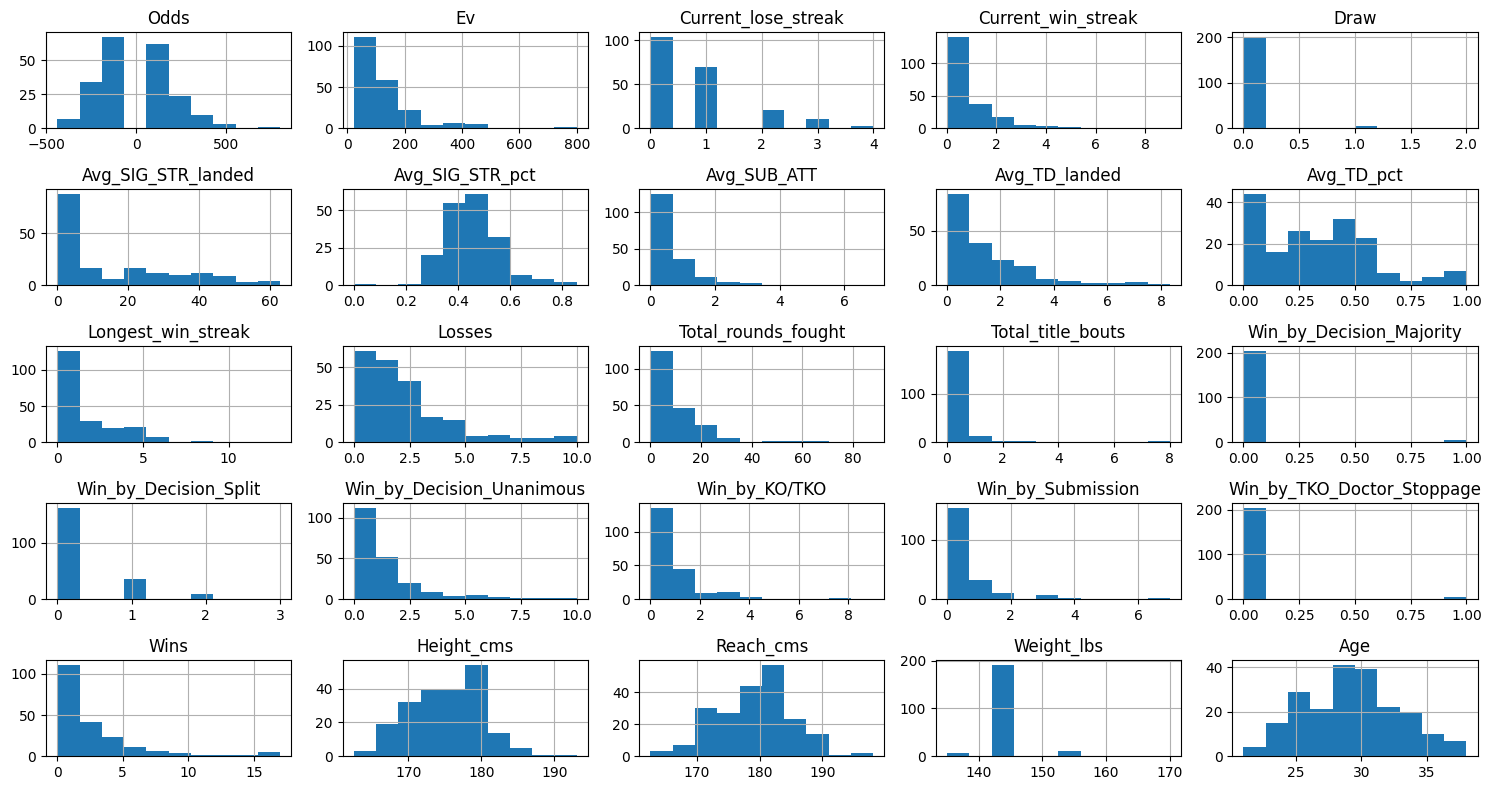

In [28]:
feather_weight_df = weight_class_dfs['Featherweight']
feather_weight_df.hist(figsize=(15,8))
plt.tight_layout()

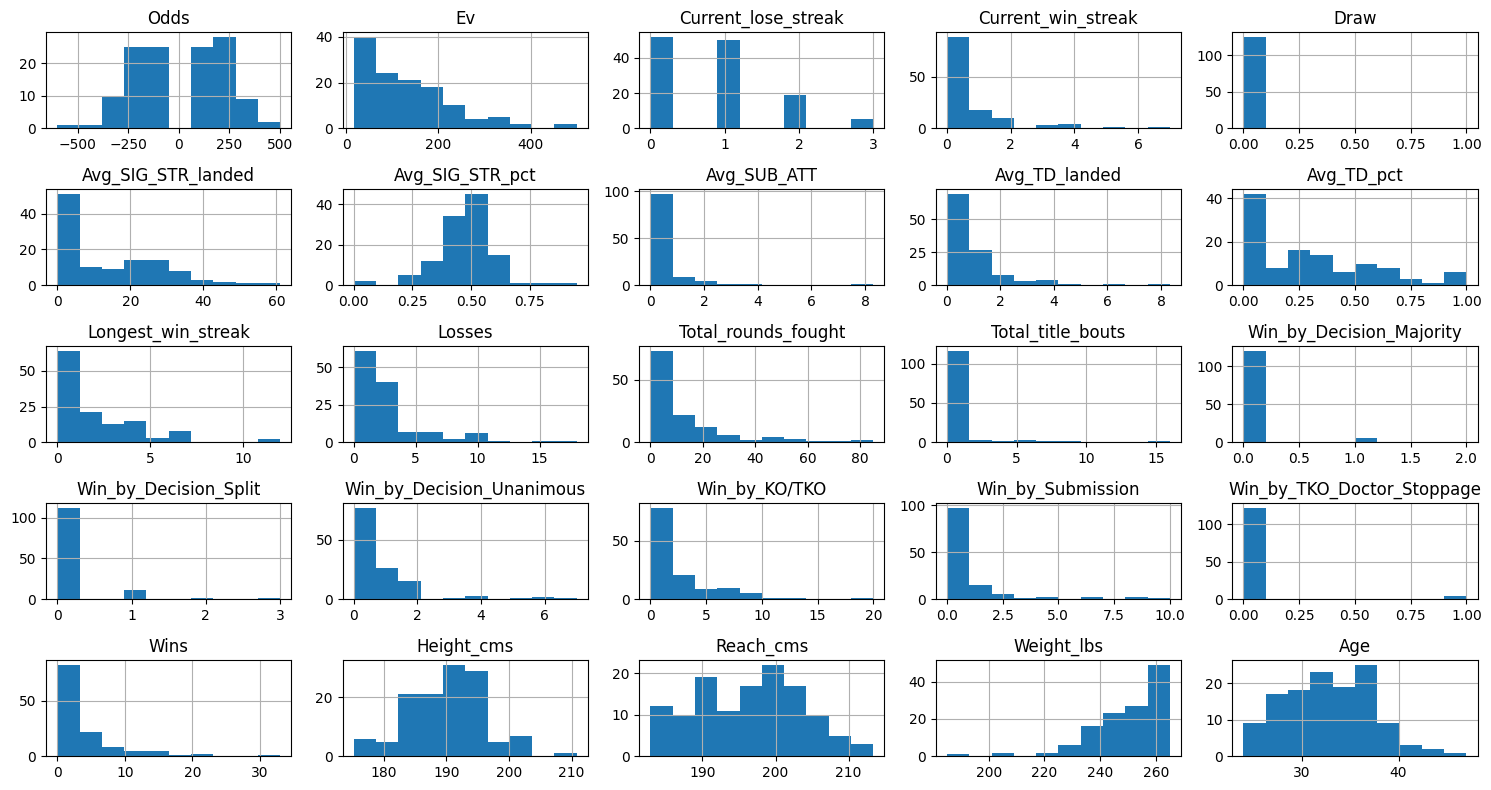

In [29]:
heavy_weight_df = weight_class_dfs['Heavyweight']
heavy_weight_df.hist(figsize=(15,8))
plt.tight_layout()

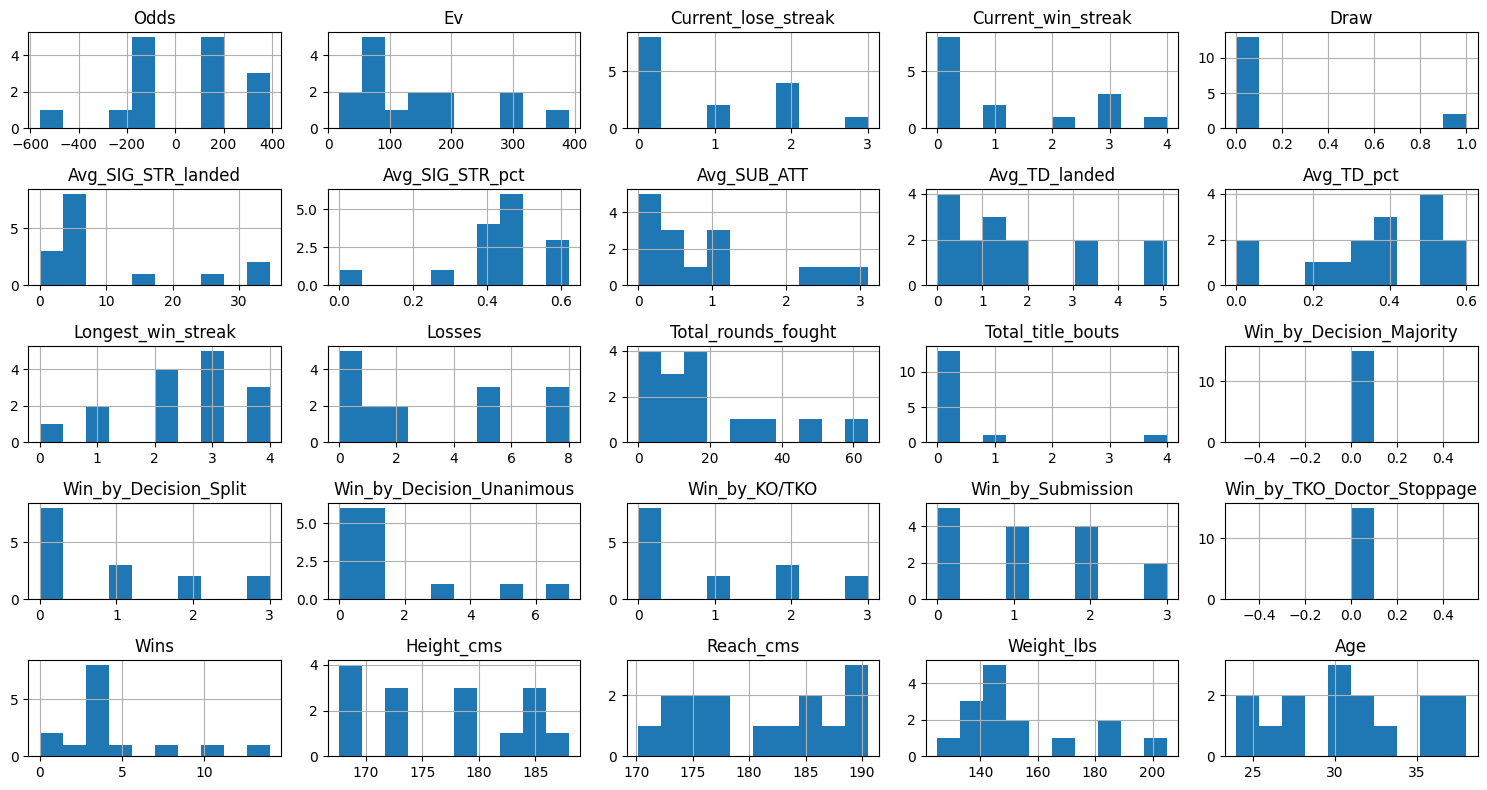

In [30]:
catch_weight_df = weight_class_dfs['Catch Weight']
catch_weight_df.hist(figsize=(15,8))
plt.tight_layout()

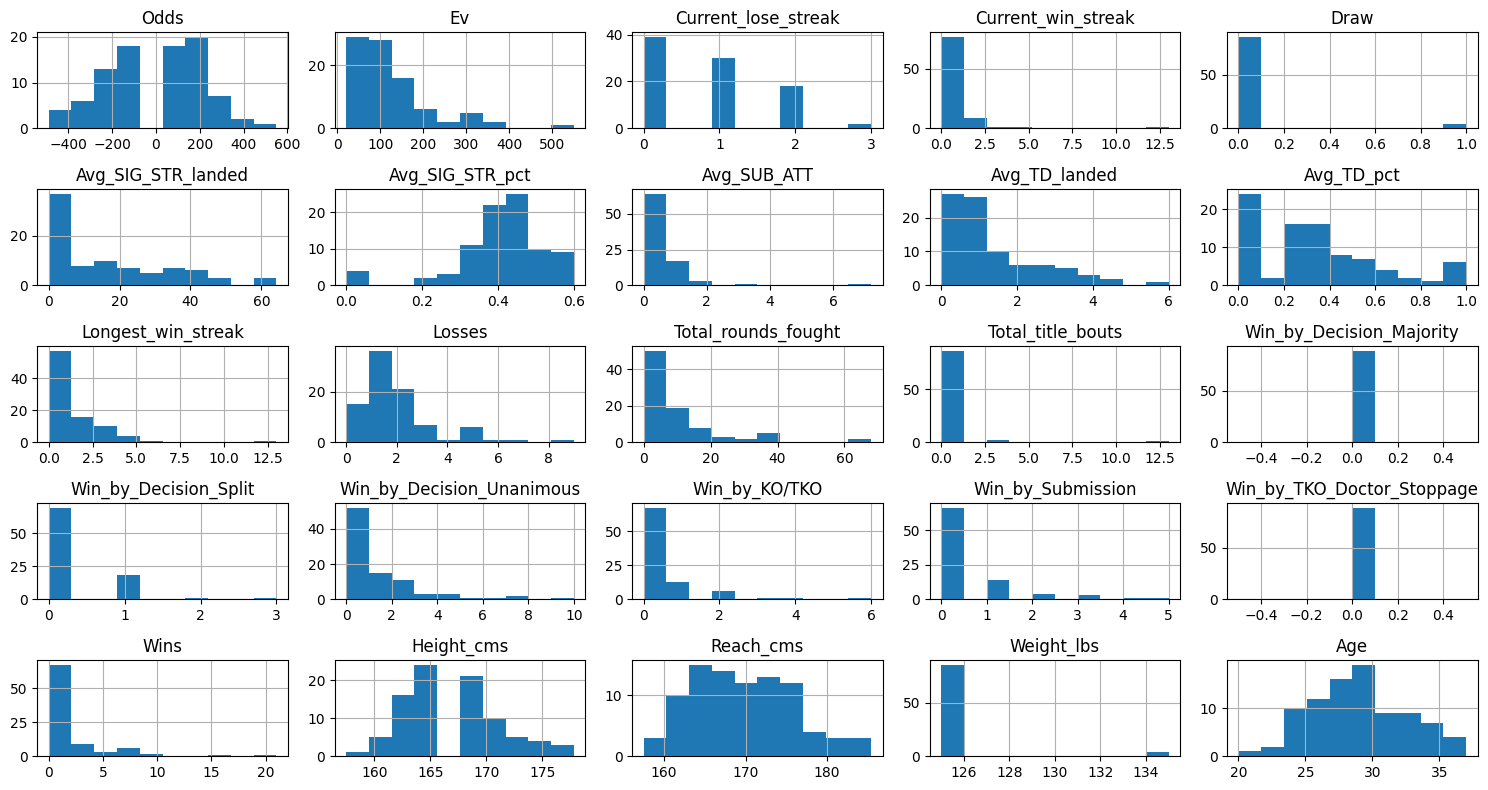

In [31]:
fly_weight_df = weight_class_dfs['Flyweight']
fly_weight_df.hist(figsize=(15,8))
plt.tight_layout()

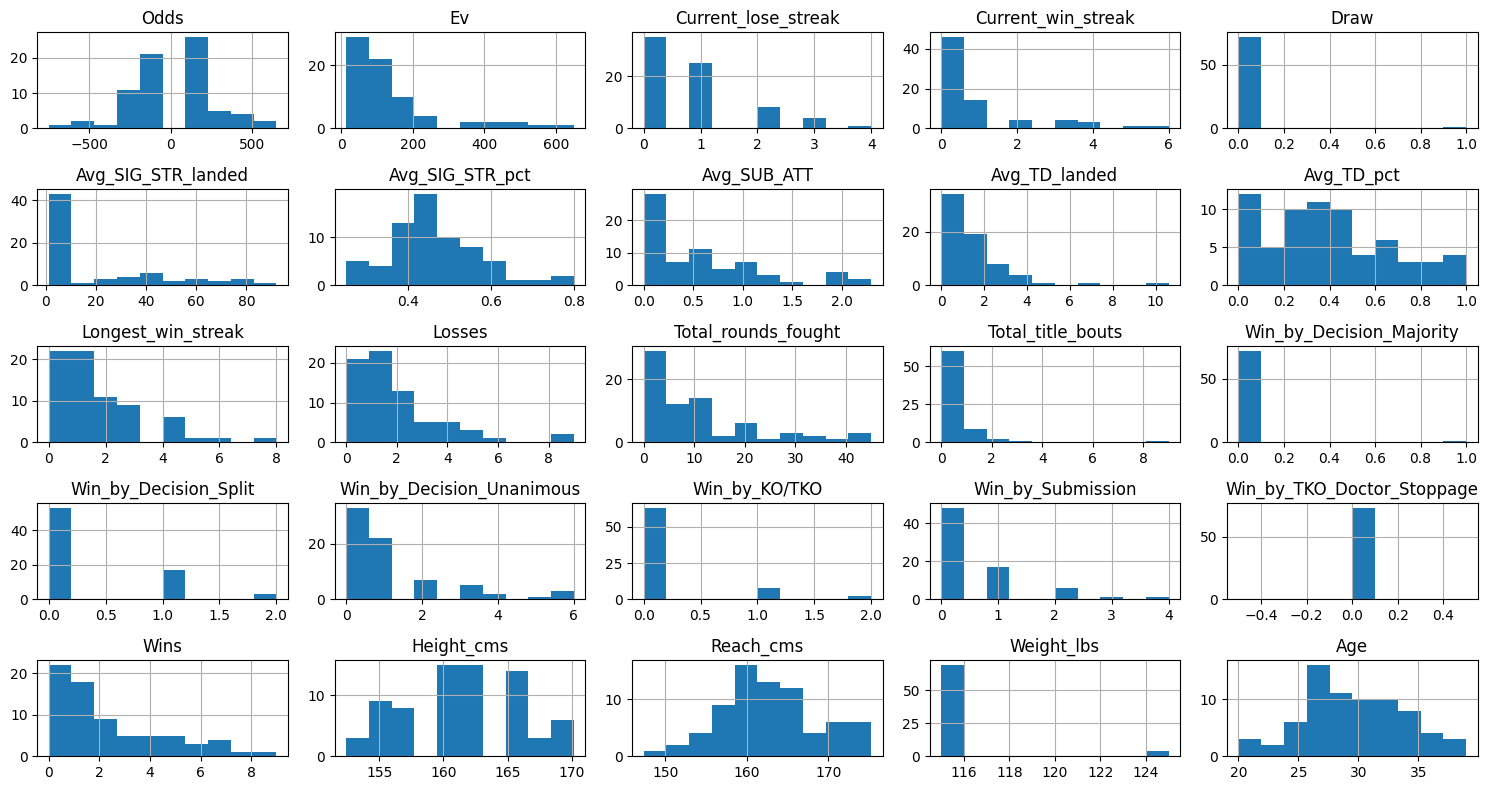

In [32]:
women_straw_weight_df = weight_class_dfs["Women's Strawweight"]
women_straw_weight_df.hist(figsize=(15,8))
plt.tight_layout()

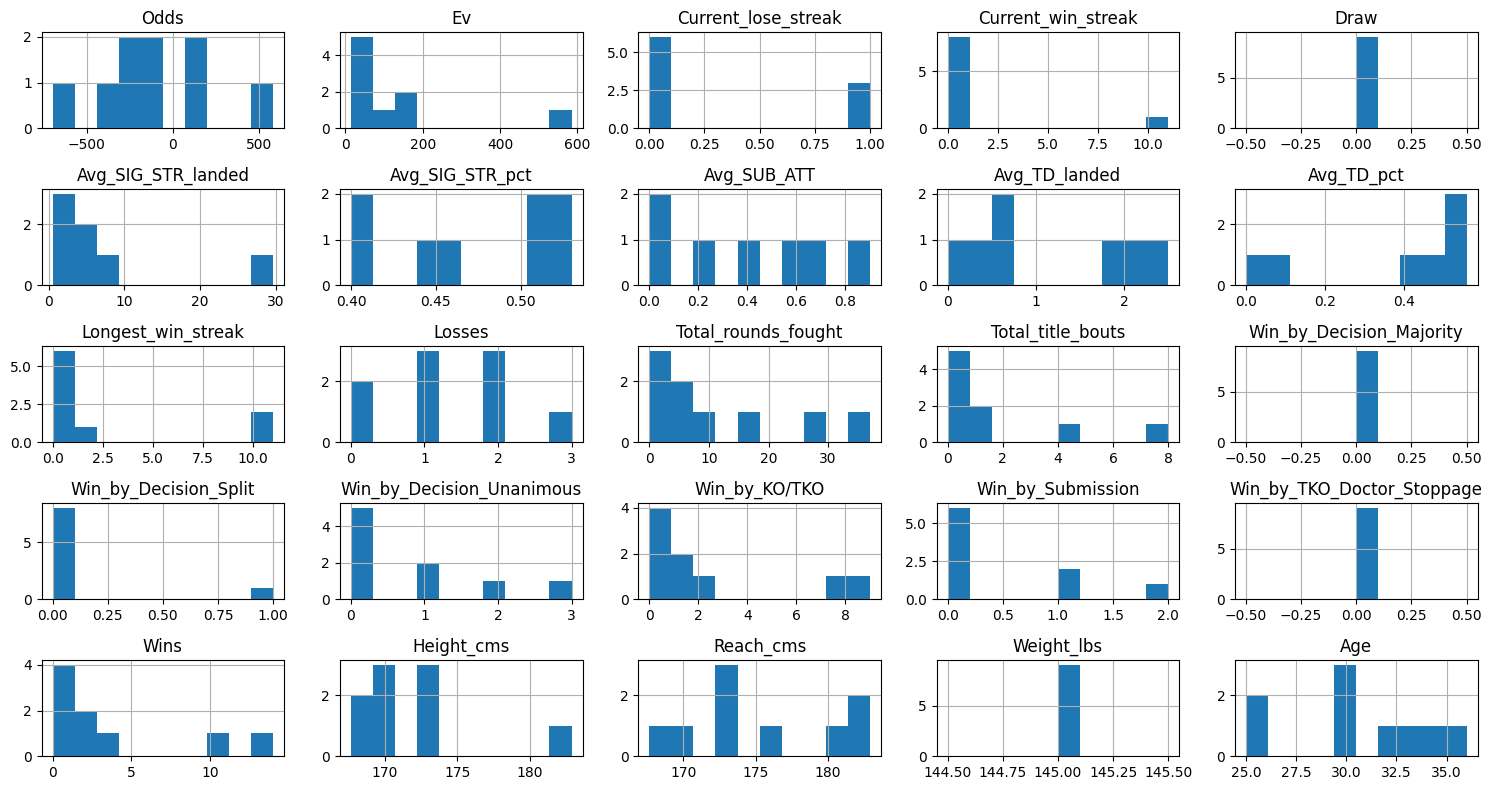

In [33]:
women_feather_weight_df = weight_class_dfs["Women's Featherweight"]
women_feather_weight_df.hist(figsize=(15,8))
plt.tight_layout()

In [34]:
#check the x info again to make sure there are only the features that is needed
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4896 non-null   object 
 1   B_fighter                     4896 non-null   object 
 2   R_odds                        4895 non-null   float64
 3   B_odds                        4896 non-null   int64  
 4   R_ev                          4895 non-null   float64
 5   B_ev                          4896 non-null   float64
 6   title_bout                    4896 non-null   bool   
 7   weight_class                  4896 non-null   object 
 8   gender                        4896 non-null   object 
 9   no_of_rounds                  4896 non-null   int64  
 10  B_current_lose_streak         4896 non-null   int64  
 11  B_current_win_streak          4896 non-null   int64  
 12  B_draw                        4896 non-null   int64  
 13  B_a

Data preprocessing after we explored the data

In [35]:
# Drop the R_fighter and B_fighter this will not affect that much(this will be not realistic if we make individual fighter a feature)
x = x.drop(['R_fighter','B_fighter'],axis=1)

# Handle missing numerical values by imputation using the mean
for col in x.select_dtypes(include=['float64', 'int64']):
    x[col].fillna(x[col].mean(), inplace=True)


numerical_features = x.select_dtypes(include=['float64', 'int64']).columns.tolist()
binary_features = ['title_bout']  
x['title_bout'] = x['title_bout'].map({True: 1, False: 0})
numerical_features = [feat for feat in numerical_features if feat not in binary_features]

# Normalize the 
scaler = StandardScaler()
x[numerical_features] = scaler.fit_transform(x[numerical_features])



categorical_features = ['weight_class', 'gender', 'B_Stance', 'R_Stance']
one_hot_encoder = OneHotEncoder()

# One-hot encode categorical variables
x = pd.get_dummies(x, columns=categorical_features)


In [36]:
#convert all features into float
for col in x.select_dtypes(include=['bool','int64']).columns:
    x[col] = x[col].astype(float)

In [37]:
y = y.map({'Red':1,'Blue':0})

In [38]:
#check the data type after preprocessing
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 91 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   R_odds                              4896 non-null   float64
 1   B_odds                              4896 non-null   float64
 2   R_ev                                4896 non-null   float64
 3   B_ev                                4896 non-null   float64
 4   title_bout                          4896 non-null   float64
 5   no_of_rounds                        4896 non-null   float64
 6   B_current_lose_streak               4896 non-null   float64
 7   B_current_win_streak                4896 non-null   float64
 8   B_draw                              4896 non-null   float64
 9   B_avg_SIG_STR_landed                4896 non-null   float64
 10  B_avg_SIG_STR_pct                   4896 non-null   float64
 11  B_avg_SUB_ATT                       4896 no

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

Data is ready, pipe the data into custom dataset

In [40]:
import torch
from torch.utils.data import Dataset, DataLoader

class UFCdataset(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features.values,dtype=torch.float32)
        self.target = torch.tensor(target.values,dtype=torch.float32)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index],self.target[index]

In [41]:
import torch.nn as nn
import torch.nn.functional as F

class MultiLayerPerceptronModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(MultiLayerPerceptronModel, self).__init__()
        #input pixel of image feed to hidden layer
        self.layer1 = nn.Linear(input_size, hidden_size) 
        self.layer2 = nn.Linear(hidden_size, hidden_size) 
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(dropout_rate)
        self.layer3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.tanh(self.layer1(x))
        x = self.tanh(self.layer2(x))
        x = self.dropout(x)
        x = self.layer3(x)
        return x

In [42]:
def training(model, train_fight_loader, loss_function, epochs, optimizer):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for features, targets in train_fight_loader:
            optimizer.zero_grad()  # Clear previous gradients
            predictions = model(features)
            predictions = predictions.view(-1)  # Ensure the predictions match target shape
            targets = targets.float()  # Ensure targets are float for BCEWithLogitsLoss
            loss = loss_function(predictions, targets)  # Compute loss
            loss.backward()  # Perform backpropagation
            optimizer.step()  # Update model parameters
            total_loss += loss.item()  # Accumulate the loss

        average_loss = total_loss / len(train_fight_loader)  # Calculate average loss for the epoch
        print(f"Epoch {epoch+1} completed. Average Loss: {average_loss:.4f}")


In [43]:
def evaluation(model, fight_loader):
    model.eval()
    correct = total = 0
    with torch.no_grad():  # No gradients needed
        for features, targets in fight_loader:
            predictions = model(features)
            predictions = predictions.view(-1)
            predicted = torch.sigmoid(predictions).round()  # Apply sigmoid and round
            
            # targets are in the same shape as predicted
            correct += (predicted.view(-1) == targets.view(-1)).sum().item()
            total += targets.size(0)
    
    accuracy = 100 * correct / total
    return accuracy

In [44]:
train_data = UFCdataset(X_train,y_train)
test_data = UFCdataset(X_test,y_test)

Define Hyper-parameter then training

In [49]:
input_size = 91
hidden_size = 256
output_size = 1
loss_function = torch.nn.BCEWithLogitsLoss()
epoch = 70
dropout_rate = 0.4
model = MultiLayerPerceptronModel(input_size,hidden_size,output_size,dropout_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
batch_size = 32


train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
training(model,train_dataloader,loss_function,epoch,optimizer)

Epoch 1 completed. Average Loss: 0.6456
Epoch 2 completed. Average Loss: 0.6213
Epoch 3 completed. Average Loss: 0.6166
Epoch 4 completed. Average Loss: 0.6149
Epoch 5 completed. Average Loss: 0.6115
Epoch 6 completed. Average Loss: 0.6211
Epoch 7 completed. Average Loss: 0.6139
Epoch 8 completed. Average Loss: 0.6096
Epoch 9 completed. Average Loss: 0.6112
Epoch 10 completed. Average Loss: 0.6142
Epoch 11 completed. Average Loss: 0.6115
Epoch 12 completed. Average Loss: 0.6109
Epoch 13 completed. Average Loss: 0.6103
Epoch 14 completed. Average Loss: 0.6092
Epoch 15 completed. Average Loss: 0.6070
Epoch 16 completed. Average Loss: 0.6106
Epoch 17 completed. Average Loss: 0.6083
Epoch 18 completed. Average Loss: 0.6070
Epoch 19 completed. Average Loss: 0.6110
Epoch 20 completed. Average Loss: 0.6060
Epoch 21 completed. Average Loss: 0.6110
Epoch 22 completed. Average Loss: 0.6094
Epoch 23 completed. Average Loss: 0.6045
Epoch 24 completed. Average Loss: 0.6071
Epoch 25 completed. Avera

In [113]:
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
evaluation(model,test_dataloader)

66.12244897959184

In [62]:
# Save the trained model
torch.save(model, 'model.pth')

Let's exploring the machine learning model

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 91 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   R_odds                              4896 non-null   float64
 1   B_odds                              4896 non-null   float64
 2   R_ev                                4896 non-null   float64
 3   B_ev                                4896 non-null   float64
 4   title_bout                          4896 non-null   float64
 5   no_of_rounds                        4896 non-null   float64
 6   B_current_lose_streak               4896 non-null   float64
 7   B_current_win_streak                4896 non-null   float64
 8   B_draw                              4896 non-null   float64
 9   B_avg_SIG_STR_landed                4896 non-null   float64
 10  B_avg_SIG_STR_pct                   4896 non-null   float64
 11  B_avg_SUB_ATT                       4896 no

In [50]:
X_log = x.copy()

for column in X_log.columns:
    # Skip non-numeric columns or columns with negative values if any
    if X_log[column].dtype in ['int64', 'float64'] and (X_log[column] >= 0).all():
        X_log[column] = np.log1p(X_log[column])

In [78]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y, test_size=0.15)
scores = {}

Try a simple linear regression model first

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score




reg = LinearRegression()

reg.fit(X_log_train,y_log_train)

predictions=reg.predict(X_log_test)

# Apply threshold
predictions_binary = np.where(predictions > 0.5, 1, 0)

score = accuracy_score(y_log_test, predictions_binary)
scores['Linear Regression log'] = score

print(score)

0.6503401360544218


In [126]:
reg2 = LinearRegression()

reg2.fit(X_train,y_train)


predictions=reg2.predict(X_test)

# Apply threshold
predictions_binary = np.where(predictions > 0.5, 1, 0)

score = accuracy_score(y_test, predictions_binary)

scores['Linear Regression'] = score

print(score)


0.6789115646258503


It seems like the linear regression is not a good fit, try Random Forest instead

In [103]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_log_train,y_log_train)

score = rfc.score(X_log_test,y_log_test)

scores['Random Forest log'] = score

print(score)

0.6653061224489796


In [114]:
rfc2 = RandomForestClassifier()

rfc2.fit(X_train,y_train)

score = rfc2.score(X_test,y_test)

scores['Random Forest'] = score

print(score)


0.6884353741496598


Huge improvement, what about Support Vector Model?

In [105]:
from sklearn.svm import SVC

svmModel = SVC(kernel ='linear')

svmModel.fit(X_log_train,y_log_train)

score=svmModel.score(X_log_test,y_log_test)

scores['SVM linear kernel log'] = score

print(score)

0.654421768707483


In [106]:
from sklearn.svm import SVC

svmModel2 = SVC(kernel ='linear')

svmModel2.fit(X_train,y_train)

score=svmModel2.score(X_test,y_test)

scores['SVM linear kernel'] = score

print(score)

0.6802721088435374


The result looks great! Let's try a different kernel

In [107]:
from sklearn.svm import SVC

svmModel = SVC(kernel ='rbf')

svmModel.fit(X_log_train,y_log_train)

score = svmModel.score(X_log_test,y_log_test)

scores['SVM rbf kernel log'] = score

print(score)

0.6557823129251701


In [108]:
svmModel2 = SVC(kernel ='rbf')

svmModel2.fit(X_train,y_train)

score = svmModel2.score(X_test,y_test)

scores['SVM rbf kernel'] = score

print(score)

0.6666666666666666


In [116]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier()

knnModel.fit(X_log_train,y_log_train)

score = knnModel.score(X_log_test,y_log_test)

scores['knn Model log'] = score

print(score)

0.5945578231292517


In [117]:
knnModel2 = KNeighborsClassifier()

knnModel2.fit(X_train,y_train)

score = knnModel2.score(X_test,y_test)

scores['knn Model'] = score

print(score)

0.6299319727891156


Let's do a visualization to compare them

C:\Users\shigo\AppData\Local\Temp\ipykernel_33636\2766865554.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Models', y='Scores', data=visualization_df, palette='coolwarm')


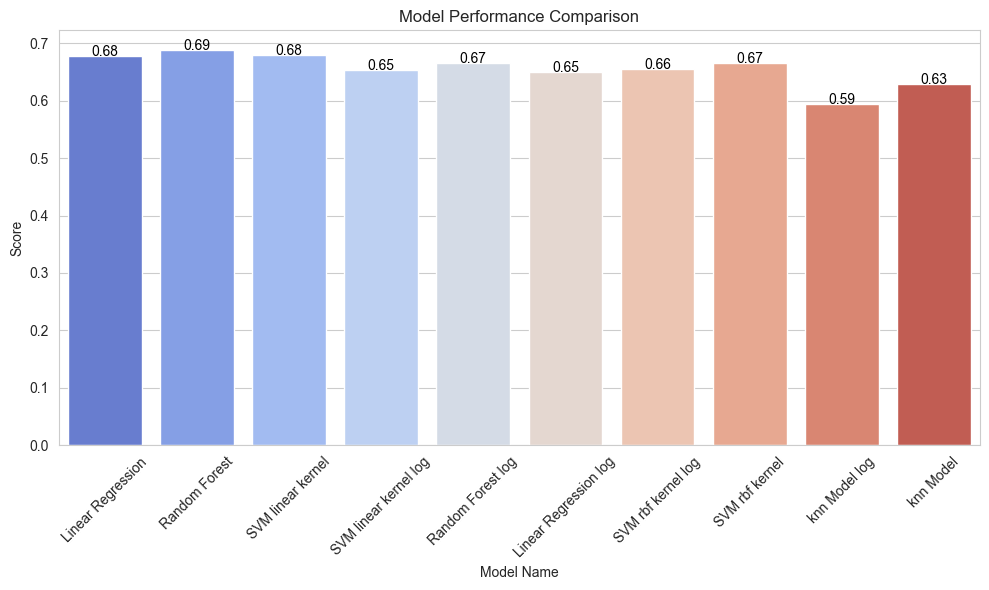

In [127]:
visualization_df = pd.DataFrame(list(scores.items()),columns=['Models','Scores'])

sns.set_style('whitegrid')

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Models', y='Scores', data=visualization_df, palette='coolwarm')

# Add the score labels on top of the bars
for index, row in visualization_df.iterrows():
    barplot.text(index, row.Scores, round(row.Scores,2), color='black', ha="center")

plt.title('Model Performance Comparison')
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate model names
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()